In [5]:
# Conjunto de datos con tres características linealmente relacionadas
# Este conjunto simula una relación lineal entre tres variables independientes y una variable objetivo.
from sklearn.datasets import make_regression
import pandas as pd

X, y = make_regression(n_samples=100, n_features=3, noise=5.0, random_state=42)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df['Target'] = y
print(df.head())


   Feature_1  Feature_2  Feature_3      Target
0  -0.792521   0.504987  -0.114736   13.149332
1   0.280992  -0.208122  -0.622700  -20.311291
2   0.791032   1.402794  -0.909387  101.284137
3   0.625667  -1.070892  -0.857158  -80.105864
4  -0.342715  -0.161286  -0.802277  -33.212103


         X1        X2        X3        X4  Y
0  1.176652  0.698162  0.008885  0.732164  1
1  2.986757  0.536096 -0.066767  0.999538  1
2  2.299627  0.309528  0.019010  0.653196  1
3  1.880741  0.813795  0.030529  0.999190  1
4  0.490147  0.684731  0.027990  0.329354  0


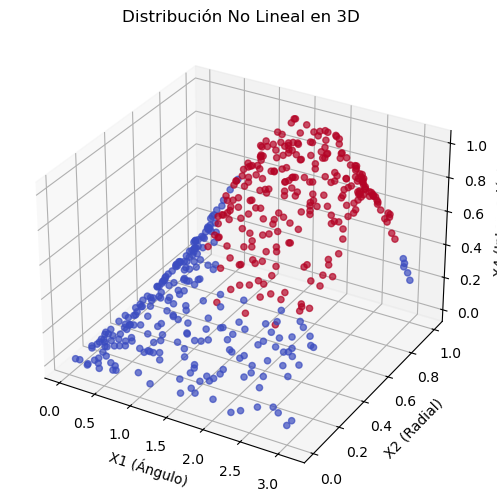

In [2]:
# Importamos las siguientes librerías:
# - numpy: para generar datos numéricos aleatorios.
# - pandas: para organizar los datos en un DataFrame.
# - matplotlib.pyplot: para visualizar los datos en 3D.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
n = 500  # número de muestras
np.random.seed(42) # Se fija una semilla

# Características
# - X1: valores entre 0 y π, simulando un ángulo.
# - X2: valores entre 0 y 1, como una distancia radial.
# - X3: ruido aleatorio con media 0 y desviación estándar 0.05.
# - X4: resultado de aplicar sin(X1 × X2), lo que introduce una relación no lineal entre X1 y X2.
X1 = np.random.uniform(0, np.pi, n)           # Ángulo en radianes
X2 = np.random.uniform(0, 1, n)               # Radial normalizado
X3 = np.random.normal(0, 0.05, n)             # Ruido gaussiano
X4 = np.sin(X1 * X2)                          # Interacción no lineal entre X1 y X2.

# Se suma la interacción no lineal (X4) con el ruido (X3).
# Si el resultado es mayor a 0.5, se asigna clase 1; si no, clase 0.
# Esto crea una frontera de decisión no lineal.
# Etiqueta binaria basada en combinación no lineal
Y = (X4 + X3 > 0.5).astype(int)

# DataFrame
# Se agrupan todas las variables en un DataFrame para facilitar su análisis y visualización.
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4,
    'Y': Y
})

# Vista previa
print(df.head())

# Visualización 3D (X1, X2, X4 coloreado por Y)
# Se crea una gráfica 3D con X1, X2 y X4, coloreando los puntos según la clase Y.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['X4'], c=df['Y'], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('X1 (Ángulo)')
ax.set_ylabel('X2 (Radial)')
ax.set_zlabel('X4 (Interacción)')
plt.title('Distribución No Lineal en 3D')
plt.show()


   Feature_1  Feature_2  Feature_3      Target
0  -0.792521   0.504987  -0.114736   13.149332
1   0.280992  -0.208122  -0.622700  -20.311291
2   0.791032   1.402794  -0.909387  101.284137
3   0.625667  -1.070892  -0.857158  -80.105864
4  -0.342715  -0.161286  -0.802277  -33.212103


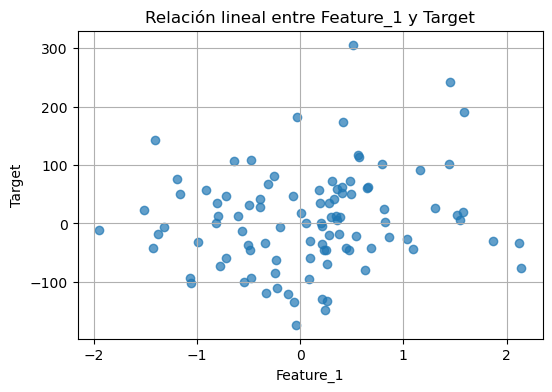

In [3]:
# Generación de un conjunto de datos sintético con relación lineal prevista entre 
# las variables independientes y una variable objetivo.

# make_regression: función de scikit-learn que genera datos simulados para regresión lineal.
# pandas: para organizar los datos en un DataFrame y facilitar su manipulación.
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos con 3 características y ruido controlado
# make_regression: genera datos con una relación lineal entre las características y la variable objetivo.
# noise=5.0: introduce variabilidad realista en los datos.
# random_state=42: asegura reproducibilidad.
# Target: es una combinación lineal de las tres características más el ruido.
# Resultado:
# X: matriz de 100 filas × 3 columnas con las características.
# y: vector de 100 valores que representan la variable objetivo, 
# calculada como combinación lineal de las características + ruido.
X, y = make_regression(
    n_samples=100,
    n_features=3,
    noise=5.0,
    random_state=42
)

# Crear DataFrame
# Se convierte la matriz X en un DataFrame con nombres de columnas descriptivos.
# Se añade la columna Target, que contiene la variable dependiente.
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df['Target'] = y

# Mostrar primeras 5 filas del DataFrame
print(df.head())

# Visualización 2D: Feature_1 vs Target
plt.figure(figsize=(6,4))
plt.scatter(df['Feature_1'], df['Target'], alpha=0.7)
plt.xlabel('Feature_1')
plt.ylabel('Target')
plt.title('Relación lineal entre Feature_1 y Target')
plt.grid(True)
plt.show()


In [16]:
# utiliza este conocimiento para llevar a cabo la reducción de la dimensión y la representación
# gráfica del primer conjunto de datos construido en la pregunta anterior.

# El conjunto generado con make_regression tiene una variable continua (Target). 
# Para aplicar LDA, necesitamos una variable categórica. Vamos a discretizarla así: 

# Calcular el mínimo y el rango
target_min = df['Target'].min()
target_max = df['Target'].max()
rango = (target_max - target_min) / 5

# Paso 2: función para asignar clase
def asignar_clase(valor):
    if valor < target_min + rango:
        return 1
    elif valor < target_min + 2*rango:
        return 2
    elif valor < target_min + 3*rango:
        return 3
    elif valor < target_min + 4*rango:
        return 4
    else:
        return 5

# Aplicar la función
df['Clase'] = df['Target'].apply(asignar_clase)


# ya tenemos el DataFrame 'df' con columnas: 'Feature_1', 'Feature_2', 'Feature_3'
X = df[['Feature_1', 'Feature_2', 'Feature_3']]
# y = df['Y']
y = df['Clase'] 

# El Análisis Discriminante Lineal (LDA) es una técnica supervisada que busca proyectar los datos 
# en un espacio de menor dimensión maximizando la separación entre clases.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

# Aplicamos LDA para reducir a 2 dimensión (ideal para clases binarias)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)


# Crear nuevo DataFrame para visualización
df_lda = pd.DataFrame({
    'LDA1': X_lda[:, 0],
    'LDA2': X_lda[:, 1],
    'Clase': y.reset_index(drop=True)  # Asegura que los índices coincidan
})



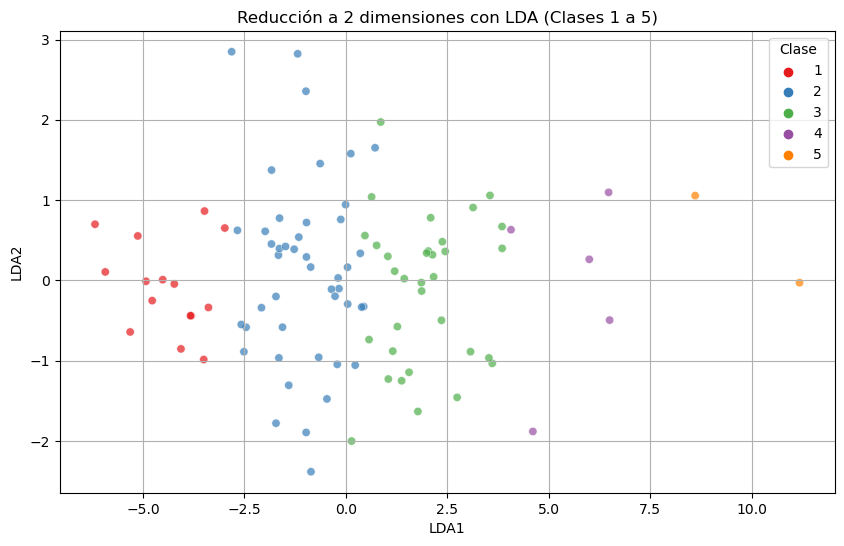

In [17]:
# Visualización de la proyección LDA
# Este gráfico muestra cómo LDA proyecta los datos en dos dimensiones donde las clases están lo más 
# separadas posible. Si hay buena separación, el modelo puede clasificar con alta precisión.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='Clase', palette='Set1', alpha=0.7)
plt.title('Reducción a 2 dimensiones con LDA (Clases 1 a 5)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.grid(True)
plt.legend(title='Clase')
plt.show()



In [1]:
# 1. Error Cuadrático Medio (mean_squared_error)
# Evalúa la diferencia promedio al cuadrado entre los valores reales y los predichos. 
# Penaliza fuertemente los errores grandes.

from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")


MSE: 0.375


In [2]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')


array([0.375])

In [3]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R²: {r2}")


R²: 0.9486081370449679
